<a href="https://colab.research.google.com/github/dzkha/DS-Unit-1-Sprint-4-Statistical-Tests-and-Experiments/blob/master/DS_Unit_1_Sprint_Challenge_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data Science Unit 1 Sprint Challenge 4

## Exploring Data, Testing Hypotheses

In this sprint challenge you will look at a dataset of people being approved or rejected for credit.

https://archive.ics.uci.edu/ml/datasets/Credit+Approval

Data Set Information: This file concerns credit card applications. All attribute names and values have been changed to meaningless symbols to protect confidentiality of the data. This dataset is interesting because there is a good mix of attributes -- continuous, nominal with small numbers of values, and nominal with larger numbers of values. There are also a few missing values.

Attribute Information:
- A1: b, a.
- A2: continuous.
- A3: continuous.
- A4: u, y, l, t.
- A5: g, p, gg.
- A6: c, d, cc, i, j, k, m, r, q, w, x, e, aa, ff.
- A7: v, h, bb, j, n, z, dd, ff, o.
- A8: continuous.
- A9: t, f.
- A10: t, f.
- A11: continuous.
- A12: t, f.
- A13: g, p, s.
- A14: continuous.
- A15: continuous.
- A16: +,- (class attribute)

Yes, most of that doesn't mean anything. A16 (the class attribute) is the most interesting, as it separates the 307 approved cases from the 383 rejected cases. The remaining variables have been obfuscated for privacy - a challenge you may have to deal with in your data science career.

Sprint challenges are evaluated based on satisfactory completion of each part. It is suggested you work through it in order, getting each aspect reasonably working, before trying to deeply explore, iterate, or refine any given step. Once you get to the end, if you want to go back and improve things, go for it!

## Part 1 - Load and validate the data

- Load the data as a `pandas` data frame.
- Validate that it has the appropriate number of observations (you can check the raw file, and also read the dataset description from UCI).
- UCI says there should be missing data - check, and if necessary change the data so pandas recognizes it as na
- Make sure that the loaded features are of the types described above (continuous values should be treated as float), and correct as necessary

This is review, but skills that you'll use at the start of any data exploration. Further, you may have to do some investigation to figure out which file to load from - that is part of the puzzle.

In [109]:
import pandas as pd

columns=[]

for n in range(1,17):
  columns.append('A'+str(n))
print(columns)

df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/credit-screening/crx.data', names=columns, na_values=['?'])
df

['A1', 'A2', 'A3', 'A4', 'A5', 'A6', 'A7', 'A8', 'A9', 'A10', 'A11', 'A12', 'A13', 'A14', 'A15', 'A16']


,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,A11,A12,A13,A14,A15,A16
0,b,30.83,0.000,u,g,w,v,1.250,t,t,1,f,g,202.0,0,+
1,a,58.67,4.460,u,g,q,h,3.040,t,t,6,f,g,43.0,560,+
2,a,24.50,0.500,u,g,q,h,1.500,t,f,0,f,g,280.0,824,+
3,b,27.83,1.540,u,g,w,v,3.750,t,t,5,t,g,100.0,3,+
4,b,20.17,5.625,u,g,w,v,1.710,t,f,0,f,s,120.0,0,+
5,b,32.08,4.000,u,g,m,v,2.500,t,f,0,t,g,360.0,0,+
6,b,33.17,1.040,u,g,r,h,6.500,t,f,0,t,g,164.0,31285,+
7,a,22.92,11.585,u,g,cc,v,0.040,t,f,0,f,g,80.0,1349,+
8,b,54.42,0.500,y,p,k,h,3.960,t,f,0,f,g,180.0,314,+
9,b,42.50,4.915,y,p,w,v,3.165,t,f,0,t,g,52.0,1442,+


In [110]:
df.isna().sum()

A1     12
A2     12
A3      0
A4      6
A5      6
A6      9
A7      9
A8      0
A9      0
A10     0
A11     0
A12     0
A13     0
A14    13
A15     0
A16     0
dtype: int64

In [114]:
df.isna().sum()['A5']

6

In [122]:
df['A5'].mode()[0]

'g'

In [0]:
for col in df:
    dt = df[col].dtype 
    if df.isna().sum()[col] == 0:
      next
    else:
      if dt == int or dt == float:
          df[col].fillna(df[col].mean(), inplace=True)
      else:
          df[col].fillna(df[col].mode()[0], inplace=True)

In [116]:
df.isna().sum()

A1     0
A2     0
A3     0
A4     0
A5     0
A6     0
A7     0
A8     0
A9     0
A10    0
A11    0
A12    0
A13    0
A14    0
A15    0
A16    0
dtype: int64

In [117]:
df

,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,A11,A12,A13,A14,A15,A16
0,b,30.83,0.000,u,g,w,v,1.250,t,t,1,f,g,202.0,0,+
1,a,58.67,4.460,u,g,q,h,3.040,t,t,6,f,g,43.0,560,+
2,a,24.50,0.500,u,g,q,h,1.500,t,f,0,f,g,280.0,824,+
3,b,27.83,1.540,u,g,w,v,3.750,t,t,5,t,g,100.0,3,+
4,b,20.17,5.625,u,g,w,v,1.710,t,f,0,f,s,120.0,0,+
5,b,32.08,4.000,u,g,m,v,2.500,t,f,0,t,g,360.0,0,+
6,b,33.17,1.040,u,g,r,h,6.500,t,f,0,t,g,164.0,31285,+
7,a,22.92,11.585,u,g,cc,v,0.040,t,f,0,f,g,80.0,1349,+
8,b,54.42,0.500,y,p,k,h,3.960,t,f,0,f,g,180.0,314,+
9,b,42.50,4.915,y,p,w,v,3.165,t,f,0,t,g,52.0,1442,+


In [118]:
df.dtypes


    
#     A11: continuous.
#     A15: continuous.
   

A1      object
A2     float64
A3     float64
A4      object
A5      object
A6      object
A7      object
A8     float64
A9      object
A10     object
A11      int64
A12     object
A13     object
A14    float64
A15      int64
A16     object
dtype: object

In [0]:
for col in df:  
    if df[col].dtype == int:
      df[col] = df[col].astype(float)

In [120]:
df.dtypes

A1      object
A2     float64
A3     float64
A4      object
A5      object
A6      object
A7      object
A8     float64
A9      object
A10     object
A11    float64
A12     object
A13     object
A14    float64
A15    float64
A16     object
dtype: object

## Part 2 - Exploring data, Testing hypotheses

The only thing we really know about this data is that A16 is the class label. Besides that, we have 6 continuous (float) features and 9 categorical features.

Explore the data: you can use whatever approach (tables, utility functions, visualizations) to get an impression of the distributions and relationships of the variables. In general, your goal is to understand how the features are different when grouped by the two class labels (`+` and `-`).

For the 6 continuous features, how are they different when split between the two class labels? Choose two features to run t-tests (again split by class label) - specifically, select one feature that is *extremely* different between the classes, and another feature that is notably less different (though perhaps still "statistically significantly" different). You may have to explore more than two features to do this.

For the categorical features, explore by creating "cross tabs" (aka [contingency tables](https://en.wikipedia.org/wiki/Contingency_table)) between them and the class label, and apply the Chi-squared test to them. [pandas.crosstab](http://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.crosstab.html) can create contingency tables, and [scipy.stats.chi2_contingency](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.chi2_contingency.html) can calculate the Chi-squared statistic for them.

There are 9 categorical features - as with the t-test, try to find one where the Chi-squared test returns an extreme result (rejecting the null that the data are independent), and one where it is less extreme.

**NOTE** - "less extreme" just means smaller test statistic/larger p-value. Even the least extreme differences may be strongly statistically significant.

Your *main* goal is the hypothesis tests, so don't spend too much time on the exploration/visualization piece. That is just a means to an end - use simple visualizations, such as boxplots or a scatter matrix (both built in to pandas), to get a feel for the overall distribution of the variables.

This is challenging, so manage your time and aim for a baseline of at least running two t-tests and two Chi-squared tests before polishing. And don't forget to answer the questions in part 3, even if your results in this part aren't what you want them to be.

A2 4.295929647669026 1.9902200656148825e-05 33.706470169976846 29.854182012831473
A3 5.52998337614816 4.551680702308068e-08 5.904951140065144 3.839947780678851
A8 8.935819983773698 3.6710537401601785e-18 3.427899022801302 1.2579242819843346
A11 11.667004222431277 7.957718568079967e-29 4.605863192182411 0.6318537859007833
A14 -2.635453311174974 0.008591788512202131 164.80484894557804 199.41280260402405
A15 4.680216020964486 3.4520256956287944e-06 2038.85993485342 198.60574412532637


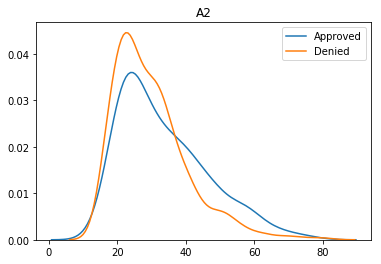

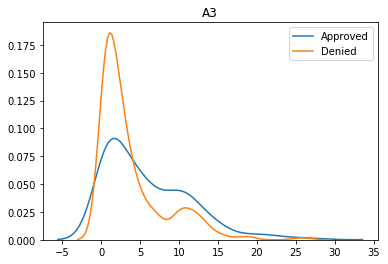

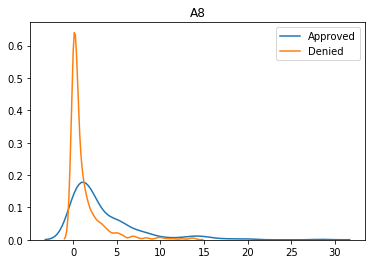

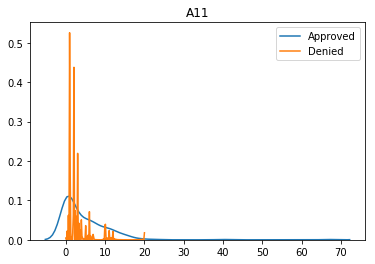

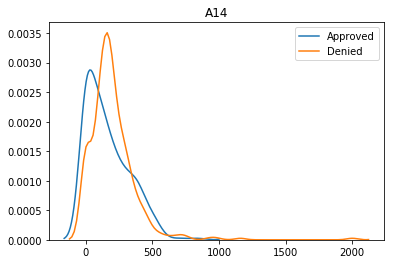

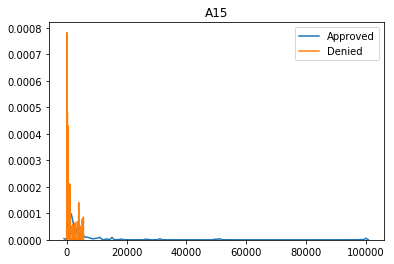

In [93]:
import numpy as np
import seaborn as sns
from scipy.stats import ttest_ind, ttest_ind_from_stats, ttest_rel
from scipy import stats
import matplotlib.pyplot as plt

cont = df.select_dtypes(include=['float64']).columns

for feat in cont:

  app = df[df['A16'] == '+'][feat]
  den = df[df['A16'] == '-'][feat]
  
  fig, ax = plt.subplots()
  sns.kdeplot(app,label="Approved")
  sns.kdeplot(den,label="Denied")
  plt.title(feat)
  

  
  t, p = ttest_ind(app, den)
  print(feat,t,p,app.mean(),den.mean())
  
  
#A11 is very different, A14 is less different
    


A1
Chi-Squared: 0.4580544855400593
P-value: 0.49853461823239964
Degrees of Freedom: 1
Expected: 
 [[ 93.43478261 213.56521739]
 [116.56521739 266.43478261]]
Accepted: count     307
unique      2
top         b
freq      209
Name: A1, dtype: object
Denied: count     383
unique      2
top         b
freq      271
Name: A1, dtype: object


A4
Chi-Squared: 26.693701541461103
P-value: 1.5978512968629162e-06
Degrees of Freedom: 2
Expected: 
 [[  0.88985507 233.58695652  72.52318841]
 [  1.11014493 291.41304348  90.47681159]]
Accepted: count     307
unique      3
top         u
freq      260
Name: A4, dtype: object
Denied: count     383
unique      2
top         u
freq      265
Name: A4, dtype: object


A5
Chi-Squared: 26.693701541461103
P-value: 1.5978512968629162e-06
Degrees of Freedom: 2
Expected: 
 [[233.58695652   0.88985507  72.52318841]
 [291.41304348   1.11014493  90.47681159]]
Accepted: count     307
unique      3
top         g
freq      260
Name: A5, dtype: object
Denied: count     383

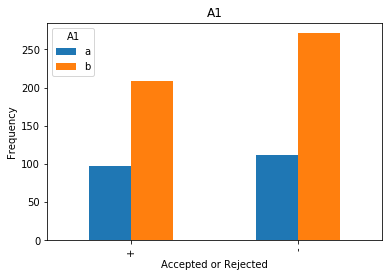

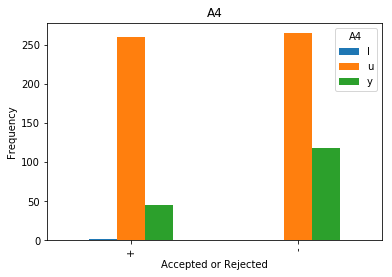

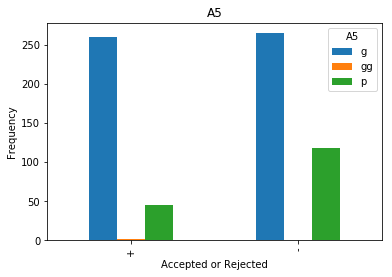

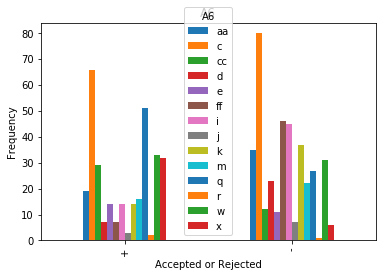

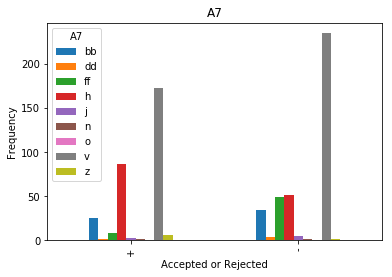

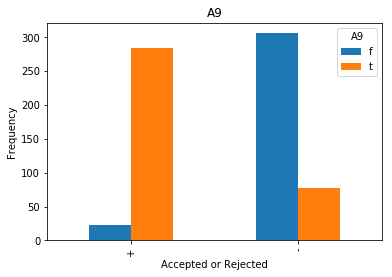

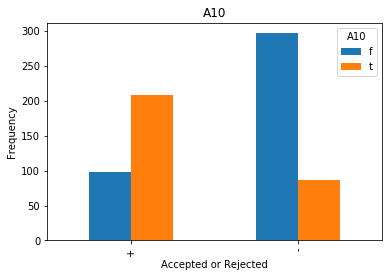

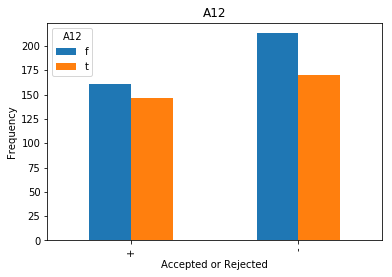

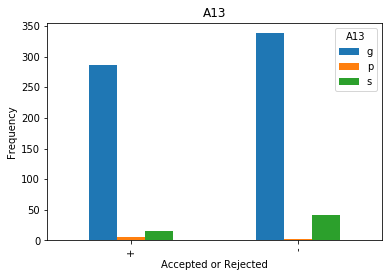

In [96]:
cat = [x for x in columns if x not in cont]
cat.remove('A16')

for feat in cat:
  contingency_table =  pd.crosstab(df['A16'], df[feat])
  chi_squared, p_value, dof, expected = stats.chi2_contingency(contingency_table)
  
  app = df[df['A16'] == '+'][feat]
  den = df[df['A16'] == '-'][feat]
  
  contingency_table.plot.bar()
  plt.xlabel("Accepted or Rejected")
  plt.ylabel("Frequency")
  plt.title(feat)
  
  print(feat)
  print(f"Chi-Squared: {chi_squared}")
  print(f"P-value: {p_value}")
  print(f"Degrees of Freedom: {dof}") 
  print("Expected: \n", np.array(expected))
  print("Accepted:",app.describe())
  print("Denied:",den.describe())
  print('\n')
  
#A9 is extremely different, A1 is not very different

## Part 3 - Analysis and Interpretation

Now that you've looked at the data, answer the following questions:

- Interpret and explain the two t-tests you ran - what do they tell you about the relationships between the continuous features you selected and the class labels?
- Interpret and explain the two Chi-squared tests you ran - what do they tell you about the relationships between the categorical features you selected and the class labels?
- What was the most challenging part of this sprint challenge?

Answer with text, but feel free to intersperse example code/results or refer to it from earlier.

The t-tests showed that A11 is very different between accepted and rejected candidates, with it being much higher in the accepted candidates., A14 is less different but still statistically significant, with it being higher in the rejected candidates.

The chi-square tests showed that A9 is extremely different. The large majority of accepted were t and the large majority of rejected were f. A1 is similar between the groups. Both accepted and rejected had a majority of b's.

The hardest part was making the plots.